# Hotel booking


## Problem statement

Whether this room will be cancelled or not

## 1. Importing Libraries

In [77]:
import numpy as np
import pandas as pd 
 
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install -U feature-engine

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3 -m pip install --upgrade pip


## 2. Loading the dataset

In [78]:
train = 'hotel_bookings.csv'
df_train = pd.read_csv(train)

## 3. Exploratory data analysis

In [79]:
# View the first five lines
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Our response label here is “is_canceled” which represents an answer to the binary question “Whether this room will be cancelled or not”

In [80]:
# Check the number of rows and columns
df_train.shape

(119390, 32)

In [81]:
# View the first five lines transposed (useful when the dataset is huge)
df_train.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


**is_canceled** is the target variable for our ML model which we want to predict (1 or 0)

It has 2 values:

1 - is canceled.

0 - is not canceled.

In [82]:
# checking data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Interpreting Data Information**
- We have 119390 rows, any column that contains lesser number of rows has missing values.
- We have 32 columns.
- There are categorical features that have data type float64.
- There are numerical features that have data type int64.
- There are numerical features that have data type object.

 We can see one column with missing values (less than the total) : company

In [83]:
# statistical summary of numerical variables
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [84]:
# summary statistics for categorical columns
df_train.describe(include=['object']).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [85]:
# We compute the number of unique elements one columns at a time as it's faster
for column in df_train.columns:
    print(column, df_train[column].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 333
company 352
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


### Univariate Analysis

In [86]:
# checking for missing values
df_train['is_canceled'].isnull().sum()

0

In [87]:
# number of unique values
df_train['is_canceled'].nunique()

2

In [88]:
# frequency distribution
df_train['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [89]:
# Percent breakdown of response variable (ratio of frequency distribution of values)
df_train['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

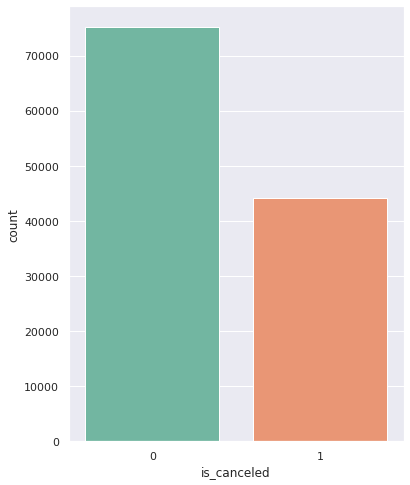

In [90]:
# visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="is_canceled", data=df_train, palette="Set2")
plt.show()

**Analyze independant variables**

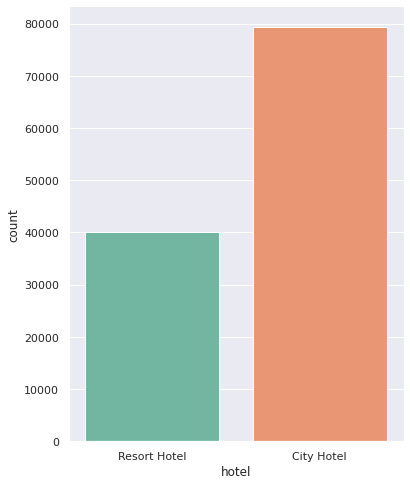

In [91]:
# visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="hotel", data=df_train, palette="Set2")
plt.show()

### Bivariate Analysis


In [92]:
df_train[["hotel", "agent"]]

,hotel,agent
0,Resort Hotel,NaN
1,Resort Hotel,NaN
2,Resort Hotel,NaN
3,Resort Hotel,304.0
4,Resort Hotel,240.0
...,...,...
119385,City Hotel,394.0
119386,City Hotel,9.0
119387,City Hotel,9.0
119388,City Hotel,89.0


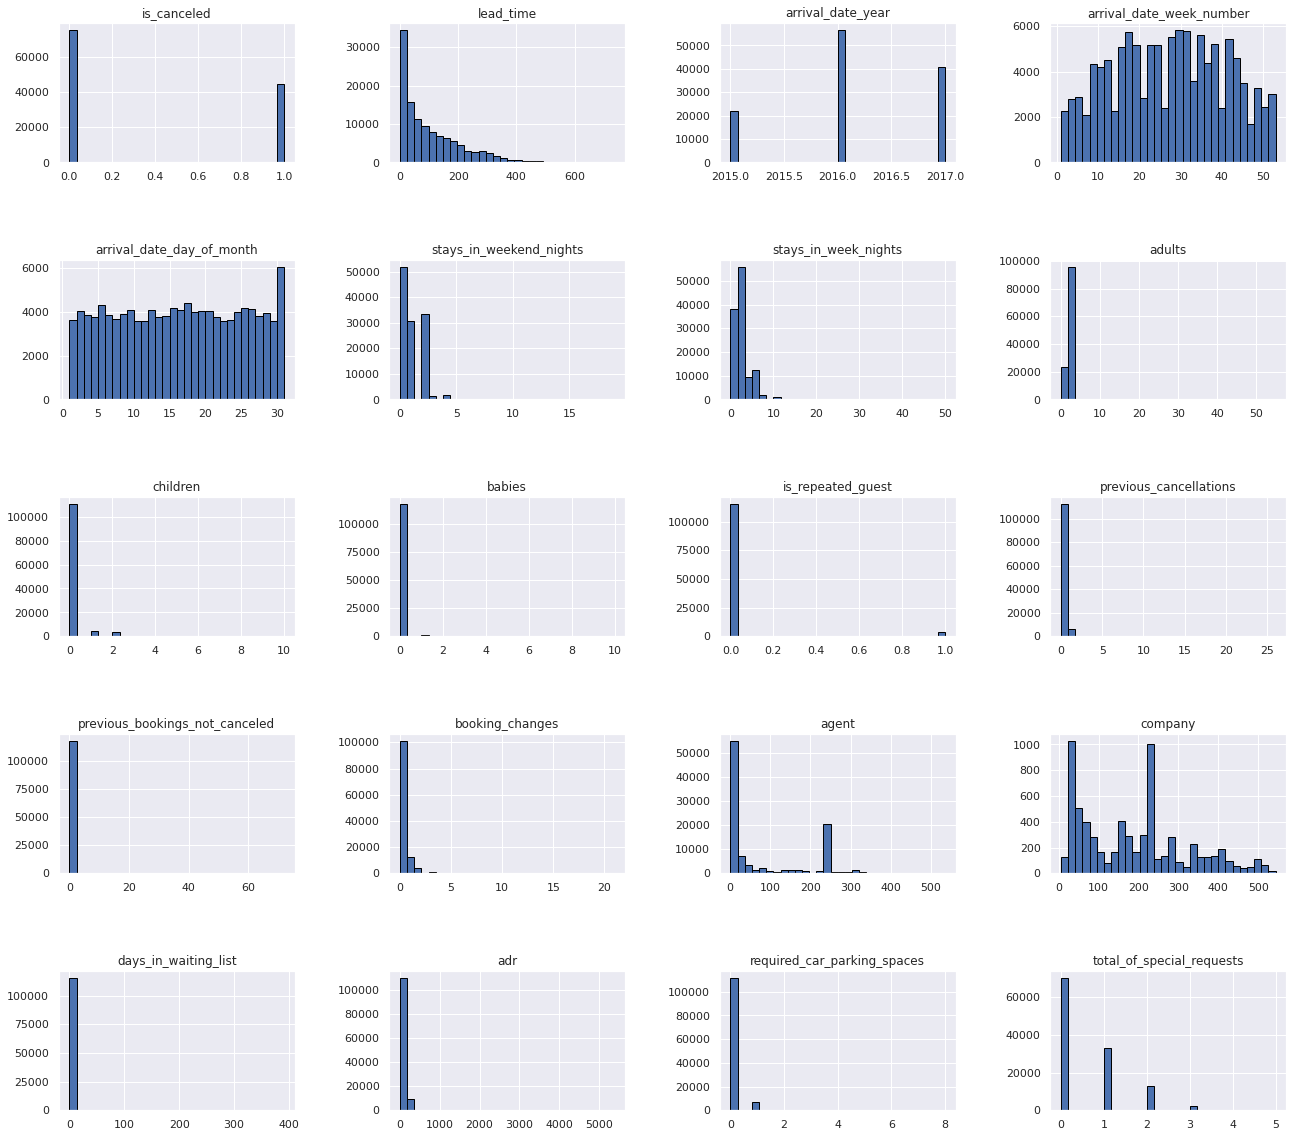

In [93]:
# distribution 
df_train.hist(figsize=(22, 20), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


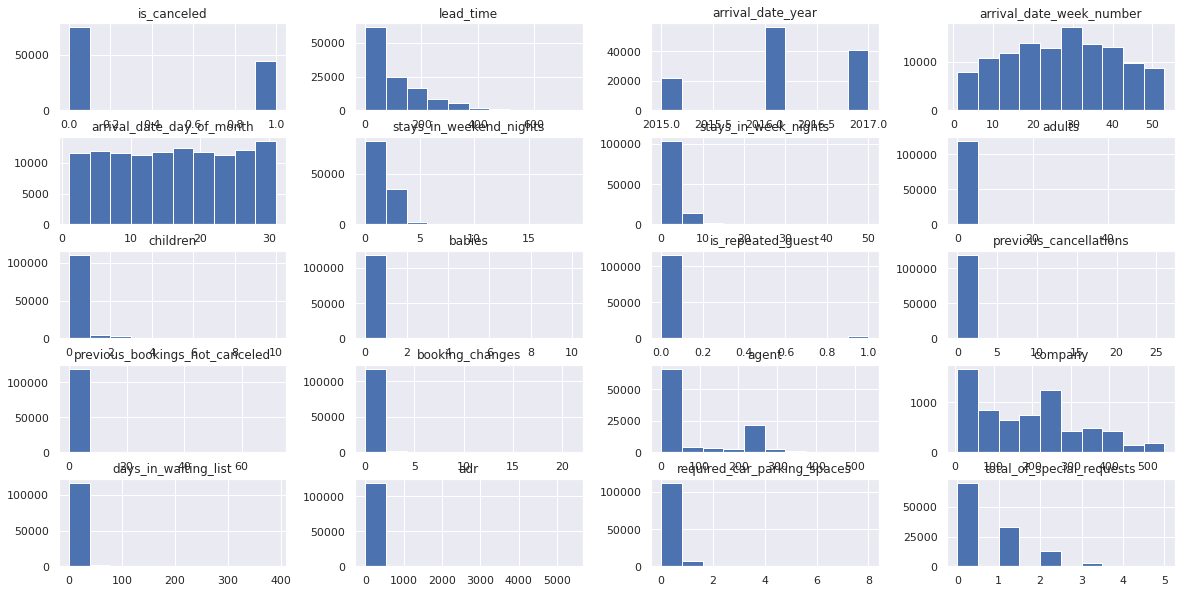

In [94]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = df_train.select_dtypes(include=numeric_types).columns.tolist()
df_train[numerical_columns].hist(figsize=(20, 10))  


In [95]:
# correlations
corr_matrix = df_train.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [96]:
# order the correlations with is_canceled
correlations = corr_matrix["is_canceled"].sort_values()
correlations


total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
booking_changes                  -0.144381
is_repeated_guest                -0.084793
agent                            -0.083114
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
company                          -0.020642
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005048
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
adults                            0.060017
previous_cancellations            0.110133
lead_time                         0.293123
is_canceled                       1.000000
Name: is_canceled, dtype: float64

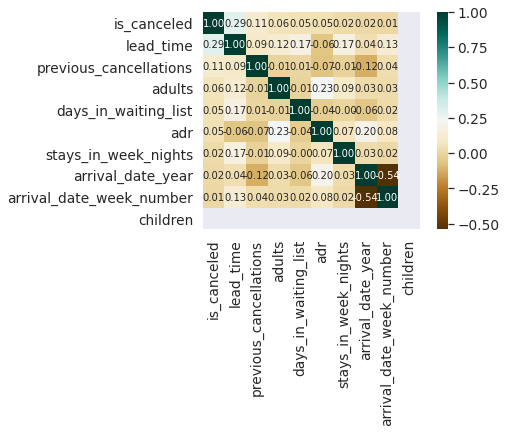

In [97]:
# check correlation matrix, darker means more correlation
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',  cmap="BrBG", annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Check missing values and outliers

#### Categorial Variables Analysis

In [98]:
# First, segregating the categorical from the dataframe.
cat_vars = ['object']
cat_df = df_train.select_dtypes(include=cat_vars)
cat_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
arrival_date_month,July,July,July,July,July
meal,BB,BB,BB,BB,BB
country,PRT,PRT,GBR,GBR,GBR
market_segment,Direct,Direct,Direct,Corporate,Online TA
distribution_channel,Direct,Direct,Direct,Corporate,TA/TO
reserved_room_type,C,C,A,A,A
assigned_room_type,C,C,C,A,A
deposit_type,No Deposit,No Deposit,No Deposit,No Deposit,No Deposit
customer_type,Transient,Transient,Transient,Transient,Transient


In [99]:
# printing missing value and labels in each column
print(cat_df.isnull().sum(), "=============")
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64 =============
hotel has 2 labels
arrival_date_month has 12 labels
meal has 5 labels
country has 178 labels
market_segment has 8 labels
distribution_channel has 5 labels
reserved_room_type has 10 labels
assigned_room_type has 12 labels
deposit_type has 3 labels
customer_type has 4 labels
reservation_status has 3 labels
reservation_status_date has 926 labels


In [100]:
# select categorical columns
cat_df = df_train.select_dtypes(include=cat_vars)
cat_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [101]:
# select categorical columns
cat_df = df_train.select_dtypes(include=cat_vars)
cat_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

#### Numerical Variables Analysis

In [102]:
# isolating numerical columns in a dataframe
numerics = ['int64', 'float64']
num_df = df_train.select_dtypes(include=numerics)
num_df.head().T

,0,1,2,3,4
is_canceled,0.0,0.0,0.0,0.0,0.0
lead_time,342.0,737.0,7.0,13.0,14.0
arrival_date_year,2015.0,2015.0,2015.0,2015.0,2015.0
arrival_date_week_number,27.0,27.0,27.0,27.0,27.0
arrival_date_day_of_month,1.0,1.0,1.0,1.0,1.0
stays_in_weekend_nights,0.0,0.0,0.0,0.0,0.0
stays_in_week_nights,0.0,0.0,1.0,1.0,2.0
adults,2.0,2.0,1.0,1.0,2.0
children,0.0,0.0,0.0,0.0,0.0
babies,0.0,0.0,0.0,0.0,0.0


In [103]:
num_df.isnull().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
dtype: int64

In [104]:
# Percent of missing data in each column
df_train.isnull().mean() 


hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [105]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
company,112593,0.943069
agent,16340,0.136862
country,488,0.004087
children,4,0.000034
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


In [106]:
# plot missing data
features_stat = df_train.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(df_train))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
24,company,112593,0.943069
23,agent,16340,0.136862
13,country,488,0.004087
10,children,4,0.000034
19,reserved_room_type,0,0.000000
20,assigned_room_type,0,0.000000
21,booking_changes,0,0.000000
22,deposit_type,0,0.000000
0,hotel,0,0.000000
17,previous_cancellations,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

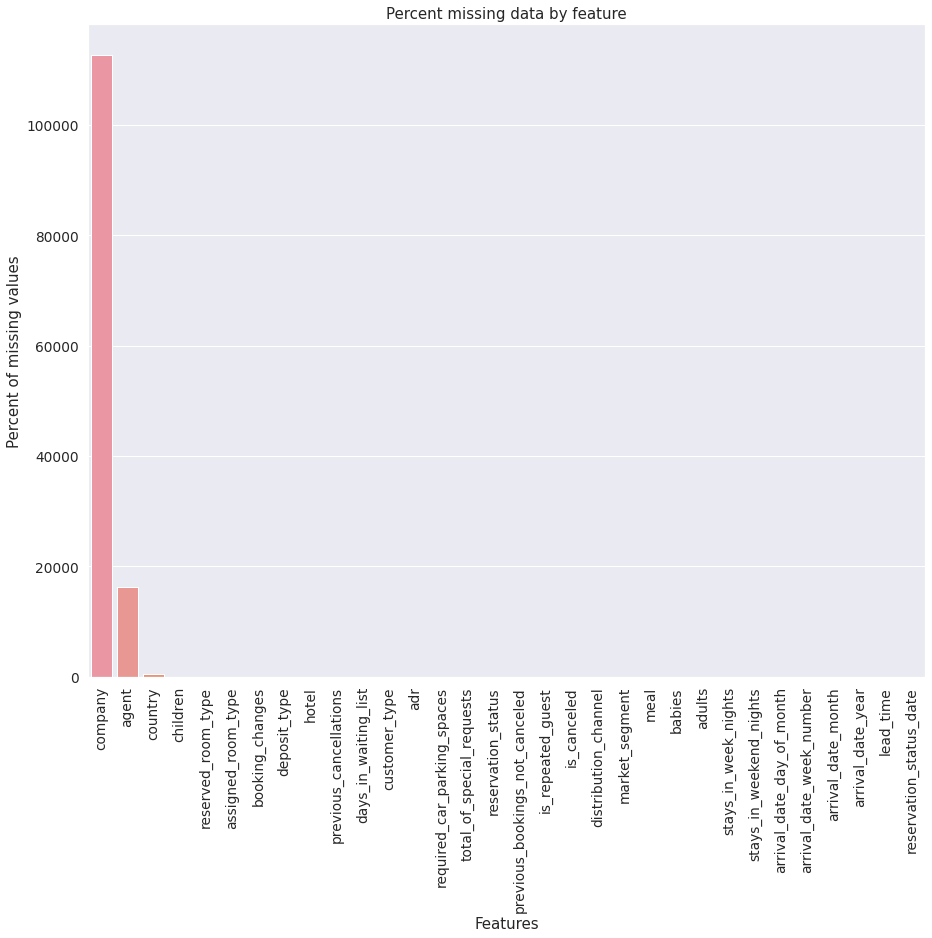

In [107]:
# Plot missing values

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Outlier Analysis

In [108]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


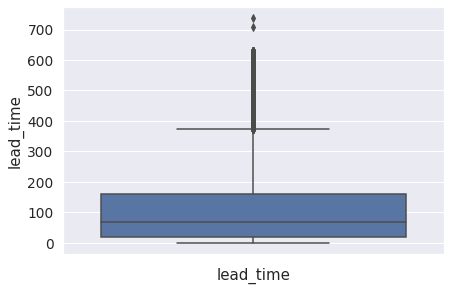

In [109]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df_train["lead_time"])
ax.set_xlabel("lead_time")
sns.set(style="darkgrid")

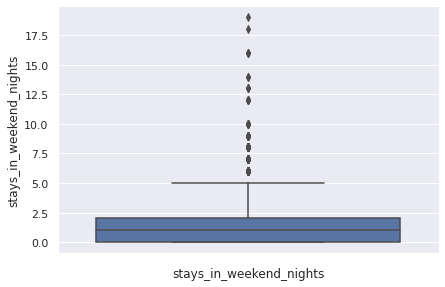

In [110]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df_train["stays_in_weekend_nights"])
ax.set_xlabel("stays_in_weekend_nights")
sns.set(style="darkgrid")

## 4. Feature engineering

### Feature Improvement

In [111]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = df_train.select_dtypes(include=numeric_types).columns.tolist()

numerical_columns

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [112]:
# Imputing Missing Quantitative Data
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')

print(df_train['agent'].head())  # show the first 5 values before imputing

print(f"\n\nMean of agent column is {df_train['agent'].mean()}\n\n")

df_train['agent'] = numerical_imputer.fit_transform(df_train[['agent']])

0      NaN
1      NaN
2      NaN
3    304.0
4    240.0
Name: agent, dtype: float64


Mean of agent column is 86.69338185346919




In [113]:
df_train['agent'].head()

0     86.693382
1     86.693382
2     86.693382
3    304.000000
4    240.000000
Name: agent, dtype: float64

In [114]:
# Imputing Missing Qualititative Data

categorical_imputer = SimpleImputer(strategy='most_frequent')

print(df_train['country'].head())

df_train['country'] = categorical_imputer.fit_transform(df_train[['country']])

0    PRT
1    PRT
2    GBR
3    GBR
4    GBR
Name: country, dtype: object


In [115]:
# formatting reservation_status_date column to DateTime data type
df_train['reservation_status_date'] = pd.to_datetime(df_train['reservation_status_date'])

# checking data info again
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [116]:
# extracting month from date
df_train['arrival_date_month'] = df_train['reservation_status_date'].dt.month
df_train['arrival_date_month'].head()

0    7
1    7
2    7
3    7
4    7
Name: arrival_date_month, dtype: int64

In [117]:
# dropping the original arrival_date_day_of_month column, we don't need it anymore
df_train.drop(['reservation_status_date'], axis=1, inplace=True)

In [118]:
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,86.693382,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,304.000000,NaN,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.000000,NaN,0,Transient,98.0,0,1,Check-Out


### Feature scaling

In [119]:
df_train[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(df_train[numerical_columns]),
    columns=numerical_columns
).describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,-5.713385e-17,1.000004,-0.767040,-0.767040,-0.767040,1.303712,1.303712
lead_time,119390.0,6.094277e-17,1.000004,-0.973319,-0.804878,-0.327630,0.523930,5.923385
arrival_date_year,119390.0,-8.406294e-14,1.000004,-1.634768,-0.221286,-0.221286,1.192195,1.192195
arrival_date_week_number,119390.0,-1.295034e-16,1.000004,-1.923191,-0.820662,0.061361,0.796381,1.898910
arrival_date_day_of_month,119390.0,2.475800e-17,1.000004,-1.685297,-0.888102,0.022977,0.820172,1.731251
stays_in_weekend_nights,119390.0,1.197430e-16,1.000004,-0.928890,-0.928890,0.072502,1.073895,18.097569
stays_in_week_nights,119390.0,-2.761469e-17,1.000004,-1.310240,-0.786207,-0.262174,0.261858,24.891398
adults,119390.0,3.237585e-17,1.000004,-3.204792,0.247897,0.247897,0.247897,91.744169
children,119386.0,1.714073e-17,1.000004,-0.260663,-0.260663,-0.260663,-0.260663,24.829676
babies,119390.0,2.047296e-17,1.000004,-0.081579,-0.081579,-0.081579,-0.081579,102.550120


In [121]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(df_train[numerical_columns]),
    columns=numerical_columns
).describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.0,0.000000,0.000000,1.000000,1.0
lead_time,119390.0,0.141128,0.144997,0.0,0.024423,0.093623,0.217096,1.0
arrival_date_year,119390.0,0.578277,0.353738,0.0,0.500000,0.500000,1.000000,1.0
arrival_date_week_number,119390.0,0.503176,0.261637,0.0,0.288462,0.519231,0.711538,1.0
arrival_date_day_of_month,119390.0,0.493275,0.292694,0.0,0.233333,0.500000,0.733333,1.0
stays_in_weekend_nights,119390.0,0.048821,0.052559,0.0,0.000000,0.052632,0.105263,1.0
stays_in_week_nights,119390.0,0.050006,0.038166,0.0,0.020000,0.040000,0.060000,1.0
adults,119390.0,0.033753,0.010532,0.0,0.036364,0.036364,0.036364,1.0
children,119386.0,0.010389,0.039856,0.0,0.000000,0.000000,0.000000,1.0
babies,119390.0,0.000795,0.009744,0.0,0.000000,0.000000,0.000000,1.0


### Binning

In [122]:
df_train.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,7,7,7,7,7
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


### One-hot encodings


In [123]:
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,86.693382,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,86.693382,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,304.000000,NaN,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.000000,NaN,0,Transient,98.0,0,1,Check-Out


In [124]:
categorical_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status', 'reserved_room_type', 'assigned_room_type']

from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df_train[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df_train.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df_train.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [125]:
df_train.head().T

,0,1,2,3,4
hotel,1.000000,1.000000,1.000000,1.0,1.0
is_canceled,0.000000,0.000000,0.000000,0.0,0.0
lead_time,342.000000,737.000000,7.000000,13.0,14.0
arrival_date_year,2015.000000,2015.000000,2015.000000,2015.0,2015.0
arrival_date_month,7.000000,7.000000,7.000000,7.0,7.0
arrival_date_week_number,27.000000,27.000000,27.000000,27.0,27.0
arrival_date_day_of_month,1.000000,1.000000,1.000000,1.0,1.0
stays_in_weekend_nights,0.000000,0.000000,0.000000,0.0,0.0
stays_in_week_nights,0.000000,0.000000,1.000000,1.0,2.0
adults,2.000000,2.000000,1.000000,1.0,2.0


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Feature Selection

In [127]:
# drop company
df_train = df_train.drop('company', axis=1)

In [128]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(999, inplace=True)

In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 5. Training models

- Logistic regression (perceptron)
- Naive Bayes
- Support vector machine (SVM)

In [145]:
# Remove the target variable
X = df_train.drop(["is_canceled"], axis=1)

In [146]:
# Get the target variable
y = df_train["is_canceled"]

In [147]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1) # 60/40

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, random_state=1) # 20/20

**Import algorithms for classification**

In [148]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [149]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [152]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

## 6. Evaluating models

**metrics:**

- Confusion matrix - `confusion_matrix()`
- Classification report - `classification_report()`
- Precision - `precision_score()`
- F1-score - `f1_score()`

In [153]:
# Accuracy
print("Scores of the models")
print("Logistic regression:", lr_model.score(X_val, y_val))
print("Naive Bayes:", nb_model.score(X_val, y_val))
print("SVM:", svm_model.score(X_val, y_val))

Scores of the models
Logistic regression: 0.9885529217969121
Naive Bayes: 0.9936901471368345
SVM: 0.7074294329508334


In [154]:
# make predictions on training data 
lr_y_pred = lr_model.predict(X_val)
nb_y_pred = nb_model.predict(X_val)
svm_y_pred = svm_model.predict(X_val)

In [155]:
from sklearn.metrics import f1_score

print("F1-scores of the models:")
print("Logistic regression:", f1_score(y_val, lr_y_pred))
print("Naive Bayes:", f1_score(y_val, nb_y_pred))
print("Support Vector Machine:", f1_score(y_val, svm_y_pred))

F1-scores of the models:
Logistic regression: 0.9843320085600733
Naive Bayes: 0.991562756663929
Support Vector Machine: 0.4863990589619174


In [156]:
from sklearn.metrics import precision_score

print("precision of the models:")
print("Logistic regression:", precision_score(y_val, lr_y_pred))
print("Naive Bayes:", precision_score(y_val, nb_y_pred))
print("Support Vector Machine:", precision_score(y_val, svm_y_pred))

precision of the models:
Logistic regression: 0.9993016759776536
Naive Bayes: 0.9832666962831335
Support Vector Machine: 0.6966165941316861


## 7. Testing the model

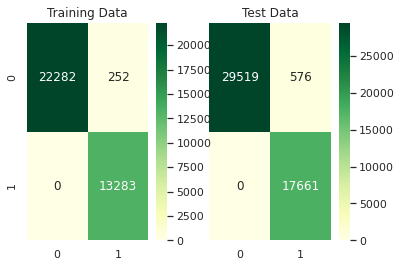

In [157]:
# Plotting confusion matrix for the different models for the Training Data
from sklearn import metrics

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

predict_train = nb_model.fit(X_train, y_train).predict(X_train)
predict_test = nb_model.fit(X_test, y_test).predict(X_test)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, predict_train)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, predict_test)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');



In [158]:
# classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     30095
           1       0.97      1.00      0.98     17661

    accuracy                           0.99     47756
   macro avg       0.98      0.99      0.99     47756
weighted avg       0.99      0.99      0.99     47756



**Use the model**

In [159]:
hotel = X_test.iloc[10]
hotel_dict = hotel.to_dict()
hotel_dict

{'hotel': 0.0,
 'lead_time': 19.0,
 'arrival_date_year': 2015.0,
 'arrival_date_month': 9.0,
 'arrival_date_week_number': 36.0,
 'arrival_date_day_of_month': 31.0,
 'stays_in_weekend_nights': 1.0,
 'stays_in_week_nights': 4.0,
 'adults': 2.0,
 'children': 0.0,
 'babies': 0.0,
 'meal': 0.0,
 'country': 15.0,
 'market_segment': 6.0,
 'distribution_channel': 3.0,
 'is_repeated_guest': 0.0,
 'previous_cancellations': 0.0,
 'previous_bookings_not_canceled': 0.0,
 'reserved_room_type': 0.0,
 'assigned_room_type': 0.0,
 'booking_changes': 0.0,
 'deposit_type': 0.0,
 'agent': 9.0,
 'days_in_waiting_list': 0.0,
 'customer_type': 0.0,
 'adr': 102.0,
 'required_car_parking_spaces': 0.0,
 'total_of_special_requests': 0.0,
 'reservation_status': 1.0}

In [164]:
nb_model.predict([hotel])[0]

/home/assitan/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0

In [165]:
y_test.iloc[10]

0